# EDA

## Noise-Less data

### EDA steps
### .     handle the missing values, null values and dublicate values
### .     check the data types and conversion
### .     check the outliers using box plot
### .     check the corelations using heatmap
### .     feature extraction

In [133]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [134]:
df = pd.read_csv("Iris.csv") # Load the dataset

In [135]:
df.head(5) # Display the first few rows of the DataFrame

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [136]:
df.isnull().sum() # Check for null values

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [137]:
df.duplicated().sum() # Check for duplicate values 

np.int64(0)

In [138]:
(df == '').sum() # Check for missing values in the DataFrame
(df == ' ').sum() # Check for empty string values in the DataFrame

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [139]:
df.dtypes # Check the data types of the columns

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [140]:
df.columns.to_list() # Get the list of column names

['Id',
 'SepalLengthCm',
 'SepalWidthCm',
 'PetalLengthCm',
 'PetalWidthCm',
 'Species']

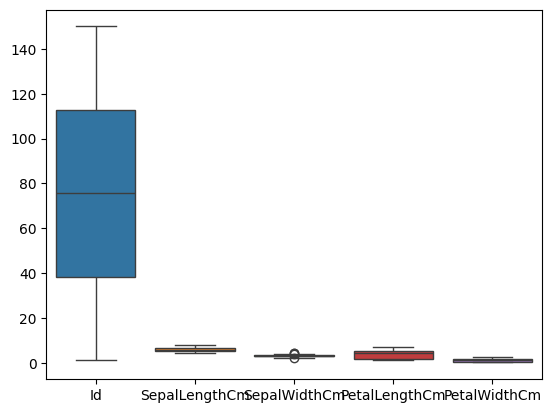

In [163]:
sns.boxplot(df)
plt.show()

In [142]:
cor = df.corr(numeric_only=True) # Calculate the correlation matrix
print(cor)


                     Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  \
Id             1.000000       0.716676     -0.397729       0.882747   
SepalLengthCm  0.716676       1.000000     -0.109369       0.871754   
SepalWidthCm  -0.397729      -0.109369      1.000000      -0.420516   
PetalLengthCm  0.882747       0.871754     -0.420516       1.000000   
PetalWidthCm   0.899759       0.817954     -0.356544       0.962757   

               PetalWidthCm  
Id                 0.899759  
SepalLengthCm      0.817954  
SepalWidthCm      -0.356544  
PetalLengthCm      0.962757  
PetalWidthCm       1.000000  


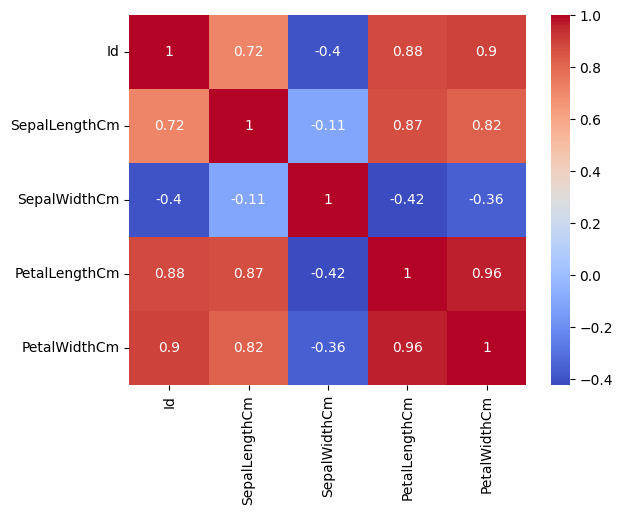

In [143]:
sns.heatmap(cor, annot=True, cmap='coolwarm')
plt.show()

## Noisy Data

In [144]:
df2 = pd.read_csv("Iris_Noisy_Dataset.csv")

In [145]:
df2.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [146]:
df2.isnull().sum() # Check for null values in the noisy dataset

sepal length (cm)    15
sepal width (cm)     15
petal length (cm)    15
petal width (cm)     15
target                0
dtype: int64

In [147]:
df2 = df2.fillna(df2.mean())

In [148]:
df2.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

In [149]:
df2.duplicated().sum() 

np.int64(1)

In [150]:
df2.drop_duplicates(inplace=True)            # Remove duplicate rows

In [151]:
df2.duplicated().sum() 

np.int64(0)

In [152]:
(df2 == '').sum()
(df2 == ' ').sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

In [153]:
df2.dtypes

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
target                 int64
dtype: object

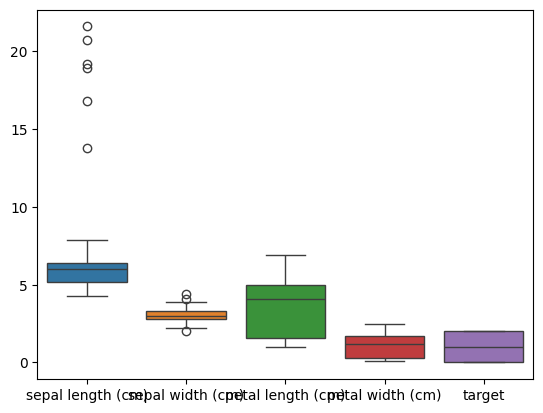

In [154]:
sns.boxplot(data = df2)
plt.show()

In [155]:
df3 = df2[df2['sepal length (cm)'] <= 10]

In [156]:
df2.shape

(149, 5)

In [157]:
df3.shape

(143, 5)

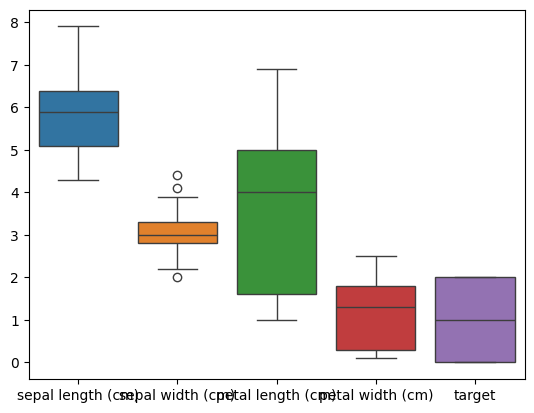

In [158]:
sns.boxplot(data = df3)
plt.show()

In [159]:
cor1 = df3.corr(numeric_only=True)
print(cor1)

                   sepal length (cm)  sepal width (cm)  petal length (cm)  \
sepal length (cm)           1.000000         -0.098458           0.726898   
sepal width (cm)           -0.098458          1.000000          -0.427312   
petal length (cm)           0.726898         -0.427312           1.000000   
petal width (cm)            0.711614         -0.327543           0.887988   
target                      0.681652         -0.402993           0.891501   

                   petal width (cm)    target  
sepal length (cm)          0.711614  0.681652  
sepal width (cm)          -0.327543 -0.402993  
petal length (cm)          0.887988  0.891501  
petal width (cm)           1.000000  0.864352  
target                     0.864352  1.000000  


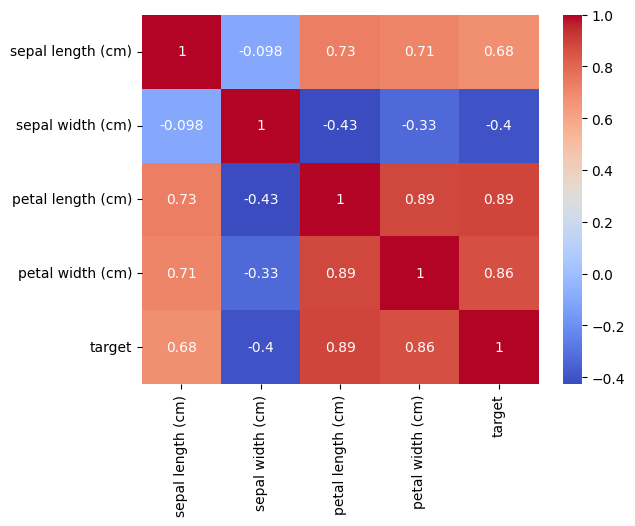

In [160]:
sns.heatmap(cor1, annot=True, cmap='coolwarm')
plt.show()